# Plotting 3D Aberrated Wavefronts
### OPTI 340 Homework 2

This program plots the 3D spherical wave aberrations for these cases:

* W200 = 1.0   # field-dependent phase

* W111 = 1.0   # tilt

* W020 = 1.0   # defocus

a plot of xp vs yp is made

H = 0, 0.5, and 1 parameters are considered

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Pupil coordinates
N = 250
xp = np.linspace(-1, 1, N)
yp = np.linspace(-1, 1, N)
XP, YP = np.meshgrid(xp, yp)

# Circular pupil
pupil = XP**2 + YP**2 <= 1


In [14]:
# Aberration coefficients (µm)

W200 = 1.0   # field-dependent phase
W111 = 1.0   # tilt
W020 = 1.0   # defocus

H_values = [0.0, 0.5, 1.0]

In [15]:
# Wave aberrations

def W_d(H):
    return W200 * H**2

def W_e(H):
    return W111 * H * YP

def W_f(H):
    return W020 * (XP**2 + YP**2)

def W_g(H):
    return (
        W200 * H**2 +
        W111 * H * YP +
        W020 * (XP**2 + YP**2)
    )

In [16]:

# To make life easier by making H =0, H=0.5, and H=1 plots for all 4 questions

def plot_case(W_func, title_prefix, zlim=None):
    fig = plt.figure(figsize=(15, 4))

    for i, H in enumerate(H_values):
        ax = fig.add_subplot(1, 3, i + 1, projection="3d")

        W = W_func(H)
        W = np.where(pupil, W, np.nan)

        surf = ax.plot_surface(
            XP, YP, W,
            cmap="viridis",
            edgecolor="none",
            antialiased=True
        )

        ax.set_title(f"{title_prefix}\nH = {H}")
        ax.set_xlabel(r"$x_p$")
        ax.set_ylabel(r"$y_p$")
        ax.set_zlabel("W (µm)")

        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)

        if zlim is not None:
            ax.set_zlim(zlim)

        # 🔑 Viewing angle chosen to emphasize tilt + curvature
        ax.view_init(elev=30, azim=-60)

        fig.colorbar(surf, ax=ax, shrink=0.6, pad=0.08)

    plt.tight_layout()
    plt.show()


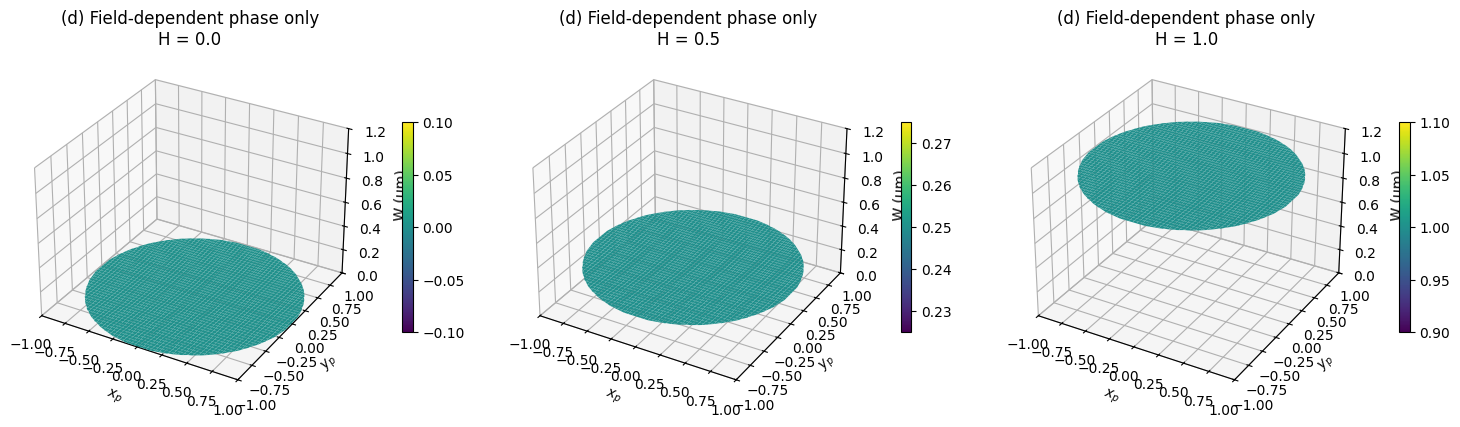

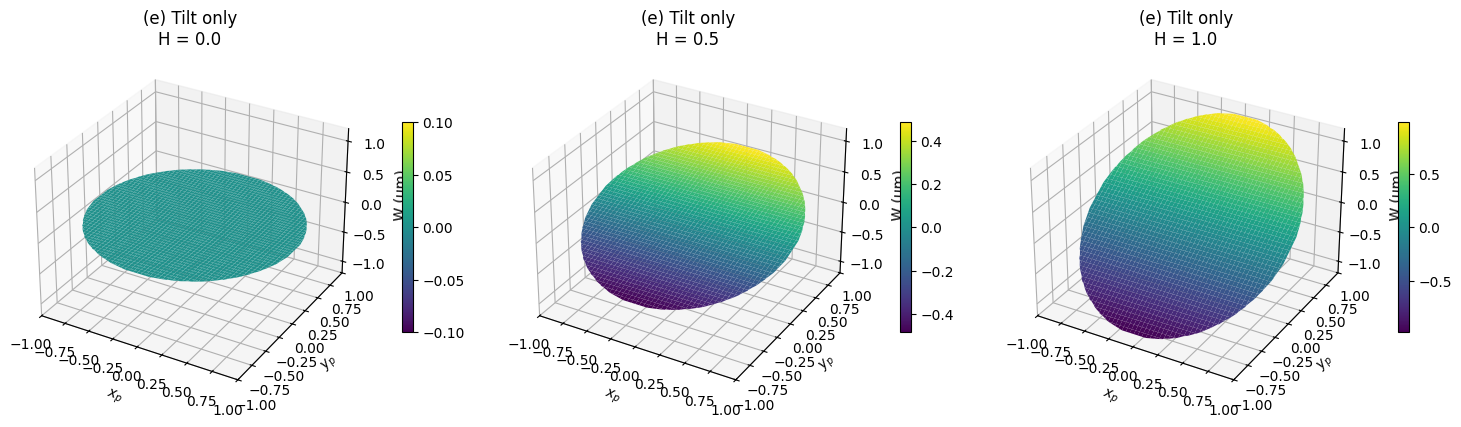

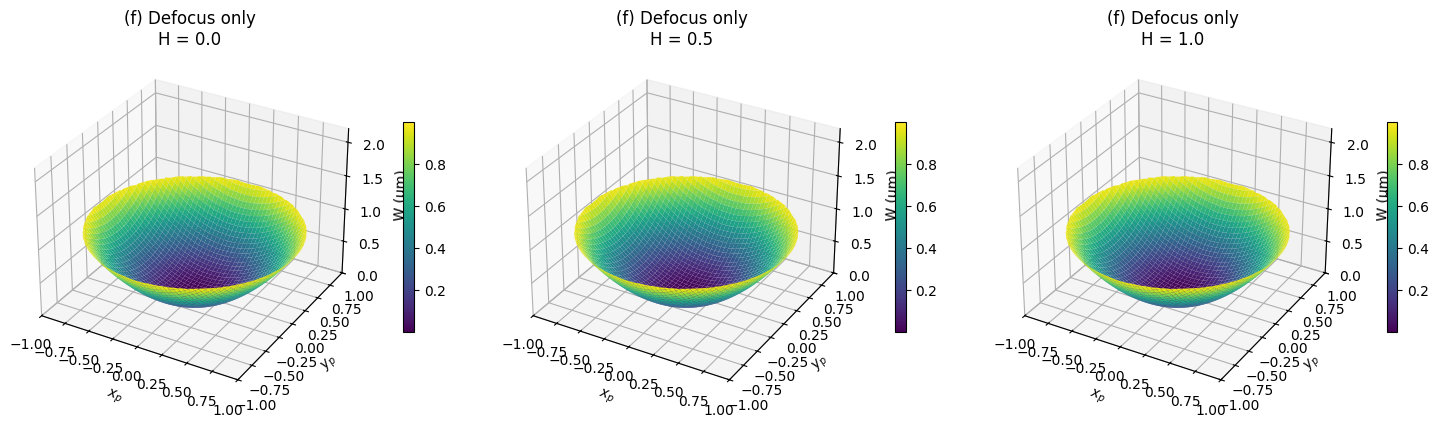

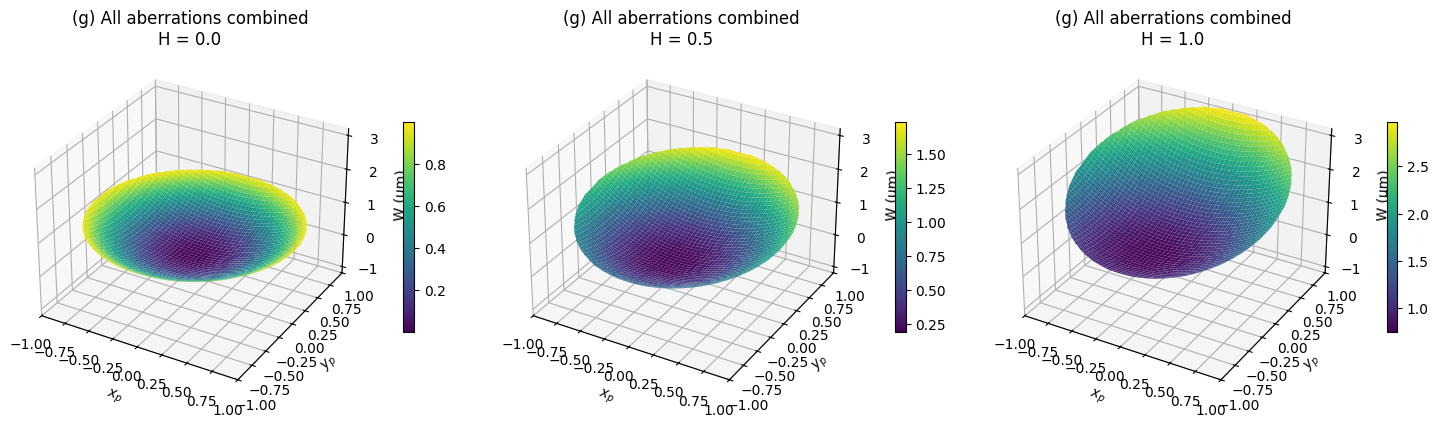

In [17]:
# Plot all homework cases

plot_case(W_d, "(d) Field-dependent phase only", zlim=(0, 1.2))
plot_case(W_e, "(e) Tilt only", zlim=(-1.2, 1.2))
plot_case(W_f, "(f) Defocus only", zlim=(0, 2.2))
plot_case(W_g, "(g) All aberrations combined", zlim=(-1.2, 3.2))